In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_copy1 = pd.read_csv('online_retail_cleaned.csv')

### Pedidos Totales Realizados

In [6]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541759 entries, 0 to 541758
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541759 non-null  object 
 1   StockCode    541759 non-null  object 
 2   Description  541759 non-null  object 
 3   Quantity     541759 non-null  int64  
 4   InvoiceDate  541759 non-null  object 
 5   UnitPrice    541759 non-null  float64
 6   CustomerID   541759 non-null  float64
 7   Country      541759 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df_copy1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df_copy1.describe()

,Quantity,UnitPrice,CustomerID
count,541759.00000,541759.000000,541759.000000
mean,9.55664,4.101184,14554.781672
std,218.11106,34.951793,1955.672182
min,-80995.00000,0.000000,12345.000000
25%,1.00000,1.250000,12356.000000
50%,3.00000,2.080000,14382.000000
75%,10.00000,4.130000,16255.000000
max,80995.00000,8142.750000,18287.000000


In [12]:
# Observamos si en Quantity hay valores iguales a cero (0)

df_copy1[df_copy1['Quantity'] == 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [30]:
# Obervamos que hay Quantity en negativo.
# Consideramos los valores negativos como devoluciones.
# Obtenemos un DF sin las devoluciones y uno solo con las devoluciones.

df_copy_nodev = df_copy1[df_copy1['Quantity']  > 0]
df_copy_dev = df_copy1[df_copy1['Quantity']  < 0]

In [15]:
df_copy_nodev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531265 entries, 0 to 541758
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531265 non-null  object 
 1   StockCode    531265 non-null  object 
 2   Description  531265 non-null  object 
 3   Quantity     531265 non-null  int64  
 4   InvoiceDate  531265 non-null  object 
 5   UnitPrice    531265 non-null  float64
 6   CustomerID   531265 non-null  float64
 7   Country      531265 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [18]:
# Consideramos cada invoice como un 'pedido'.
# Agrupamos por invoice y obtenemos el total de cada pedido.

df_copy_nodev_grouped = df_copy_nodev.groupby('InvoiceNo').agg({'Quantity': 'sum', 'UnitPrice': 'sum'}).reset_index()

In [41]:
# Del nuevo DF Grouped, hacemos un count unique de los invoices y obtenemos el total de pedidos.

print(f'El numero total de pedidos es : {df_copy_nodev_grouped['InvoiceNo'].unique().shape[0]}')

El numero total de pedidos es : 20708


In [23]:
# Calculamos el total de pedidos por pais.

df_copy_nodev_bycountry = df_copy_nodev.groupby('Country').agg({'InvoiceNo': 'nunique'}).reset_index()
df_copy_nodev_bycountry

,Country,InvoiceNo
0,Australia,57
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,6
6,Channel Islands,26
7,Cyprus,16
8,Czech Republic,2
9,Denmark,18


In [28]:
# Graficamos por porcentaje el total de pedidos por pais.

df_copy_nodev_bycountry['Percentage'] = df_copy_nodev_bycountry['InvoiceNo'] / df_copy_nodev_bycountry['InvoiceNo'].sum() * 100
df_copy_nodev_bycountry

,Country,InvoiceNo,Percentage
0,Australia,57,0.275256
1,Austria,17,0.082094
2,Bahrain,3,0.014487
3,Belgium,98,0.473247
4,Brazil,1,0.004829
5,Canada,6,0.028974
6,Channel Islands,26,0.125555
7,Cyprus,16,0.077265
8,Czech Republic,2,0.009658
9,Denmark,18,0.086923


In [29]:
# Determinamos el top 10 de paises con mas pedidos.

df_copy_nodev_bycountry.nlargest(10, 'InvoiceNo')

,Country,InvoiceNo,Percentage
36,United Kingdom,18766,90.621982
14,Germany,457,2.206877
13,France,392,1.892988
10,EIRE,288,1.390767
3,Belgium,98,0.473247
24,Netherlands,95,0.458760
31,Spain,90,0.434615
27,Portugal,58,0.280085
0,Australia,57,0.275256
33,Switzerland,54,0.260769


In [32]:
# Determinamos la cantidad de devoluciones totales
df_copy_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10494 entries, 141 to 541567
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10494 non-null  object 
 1   StockCode    10494 non-null  object 
 2   Description  10494 non-null  object 
 3   Quantity     10494 non-null  int64  
 4   InvoiceDate  10494 non-null  object 
 5   UnitPrice    10494 non-null  float64
 6   CustomerID   10494 non-null  float64
 7   Country      10494 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 737.9+ KB


In [33]:
df_copy_dev.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [40]:
# Observamos que hay devoluciones que se repiten por fila.
# Debemos sumar por InvoiceNo unico y obtener el total de devoluciones

print(f'El numero total de devoluciones es: {df_copy_dev['InvoiceNo'].nunique()}')



El numero total de devoluciones es: 5042


In [37]:
# Creamos un DF agrupado por InvoiceNo para confirmar el total de devoluciones por InvoiceNo.

df_copy_dev_grouped = df_copy_dev.groupby('InvoiceNo').agg({'Quantity': 'sum', 'UnitPrice': 'sum'}).reset_index()
df_copy_dev_grouped.head()

,InvoiceNo,Quantity,UnitPrice
0,536589,-10,0.0
1,536764,-38,0.0
2,536996,-20,0.0
3,536997,-20,0.0
4,536998,-6,0.0


In [39]:
df_copy_dev_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceNo  5042 non-null   object 
 1   Quantity   5042 non-null   int64  
 2   UnitPrice  5042 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 118.3+ KB


In [42]:
# Como cada devolucion va a la par con un pedido, podemos restar el total de devoluciones al total de pedidos.
# Con esto obtenemos el total de pedidos efectivos.

print(f'El total de pedidos efectivos es: {df_copy_nodev_grouped["InvoiceNo"].nunique() - df_copy_dev_grouped["InvoiceNo"].nunique()}')

El total de pedidos efectivos es: 15666


C:\Users\Luis\AppData\Local\Temp\ipykernel_16724\1266501817.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Total Pedidos', 'Total Devoluciones'],


<Axes: >

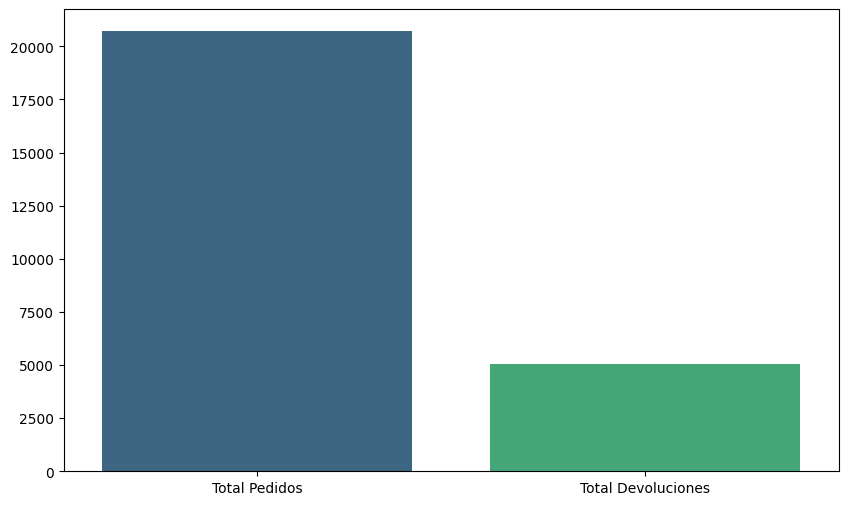

In [45]:
# Presentamos la informacion en graficos.
# Graficamos total de pedidos vs total de devoluciones.

plt.figure(figsize=(10, 6))
sns.barplot(x=['Total Pedidos', 'Total Devoluciones'], 
            y=[df_copy_nodev_grouped['InvoiceNo'].nunique(), df_copy_dev_grouped['InvoiceNo'].nunique()],
            palette='viridis')

C:\Users\Luis\AppData\Local\Temp\ipykernel_16724\3942781564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country',


<Axes: xlabel='Country', ylabel='InvoiceNo'>

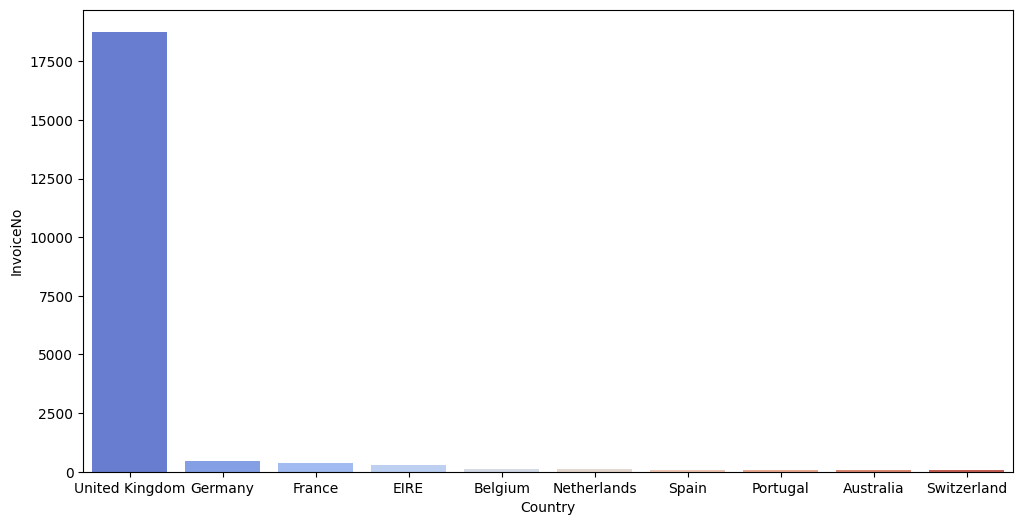

In [48]:
#Graficamos el top 10 de paises con mas pedidos.
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', 
            y='InvoiceNo', 
            data=df_copy_nodev_bycountry.nlargest(10, 'InvoiceNo'),
            palette='coolwarm')